<a href="https://colab.research.google.com/github/CesarRoldan99/CEE88_Cesar/blob/main/LAB2/Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [4]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import math 

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

9.214285714285714


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def bootstrap_mean(x, sample_size, n_bootstraps):
    a=np.empty((n_bootstraps,sample_size))  # Empty matrix n_boots. rows, sample_size columns
    data_mean=np.empty((1,n_bootstraps))        # Empty array 1 row, n_boots. columns
  
    for i in range(n_bootstraps):
        a[i]=np.random.choice(x,sample_size)    # Filling array a with bootstraps.
        data_mean[0,i]=int(np.mean(a[i]))   # Forming array with means.
  
    data_mean.sort()              # Sorting means within array.  
    lower=np.percentile(data_mean,2.5)        # Lower boundary.
    upper=np.percentile(data_mean,97.5)       # Upper boundary.

    data_mean=np.mean(data_mean)      # Mean of array data_mean
    return data_mean, lower, upper


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

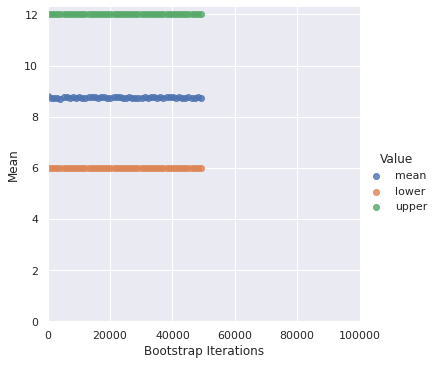

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])


df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])

sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0)
sns_plot.axes[0, 0].set_xlim(0, 100000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [7]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci): # ci in percentage
    a=np.empty((n_bootstraps, sample_size))   # Empty matrix n_boots. rows, sample_size columns
    data_mean=np.empty((1, n_bootstraps)) # Empty array 1 row, n_boots. columns
    for i in range (n_bootstraps):
        a[i]=np.random.choice(sample, sample_size) # Filling array a with bootstraps.
        data_mean[0,i]=int(np.mean(a[i]))   # Forming array with means.
    
    data_mean.sort()  # Sorting means within array.
    NumCI=(100-ci)/2  # Percentage of removal from array of means.

    lower=np.percentile(data_mean,NumCI) # Lower boundary.
    upper=np.percentile(data_mean,(100-NumCI)) # Upper boundary.

    data_mean=np.mean(data_mean) # Mean of array data_mean

    return data_mean,lower,upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

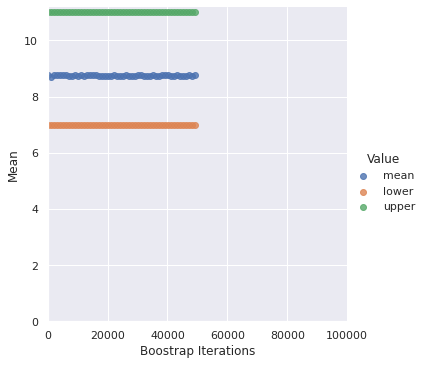

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [2]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# Note: you can add more cells as needed to organise your code and your plots


In [5]:
# Reading data.
dfVehicles = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dfVehicles.head()


,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


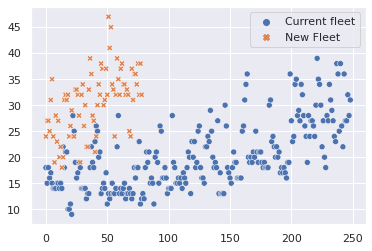

In [ ]:
# Plotting the data
sns.scatterplot(data=dfVehicles)
sns.set(style="darkgrid")

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# 1. Mean of both samples
print("The mean of the Current Fleet: ", np.mean(dfVehicles["Current fleet"]))      # Current fleet's mean
print("The mean of the New Fleet: ", np.mean(dfVehicles["New Fleet"]))      # New fleet's mean

The mean of the Current Fleet:  20.14457831325301
The mean of the New Fleet:  30.481012658227847


In [19]:
# 2. Bootstrapping

NF=[]
CF=[]
for i in dfVehicles["New Fleet"]:       # Eliminating NaNs, Not a number. As the samples have different lengh. New fleet is shorter.
    if math.isnan(i)== False:           # Checking if the value i is a NaN value, if not:
        NF.append(i)                    # Append value i to list NF

for j in dfVehicles["Current fleet"]:
    CF.append(j)

CurrentFleet_mean=bootstrap_mean_ci(dfVehicles["Current fleet"], len(dfVehicles), 10000, 92 )  # Bootsrapping Current Fleet, n=1000, ci=95
NewFleet_mean=bootstrap_mean_ci(NF, len(NF), 10000, 60 )        # Bootsrapping New Fleet, n=1000, ci=95

print(CurrentFleet_mean)
print(NewFleet_mean)

print("The mean of the Current Fleet: ", CurrentFleet_mean[0])      # Current fleet's mean
print("The mean of the Current Fleet: ", NewFleet_mean[0])      # Current fleet's mean

(19.6545, 19.0, 20.0)
(29.997, 29.0, 31.0)
The mean of the Current Fleet:  19.6545
The mean of the Current Fleet:  29.997


In [28]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci): # ci in percentage
    a=np.empty((n_bootstraps, sample_size))   # Empty matrix n_boots. rows, sample_size columns
    data_std=np.empty((1, n_bootstraps)) # Empty array 1 row, n_boots. columns
    for i in range (n_bootstraps):
        a[i]=np.random.choice(sample, sample_size) # Filling array a with bootstraps.
        data_std[0,i]=int(np.std(a[i]))   # Forming array with means.
    
    data_std.sort()  # Sorting means within array.
    NumCI=(100-ci)/2  # Percentage of removal from array of means.

    lower=np.percentile(data_std,NumCI) # Lower boundary.
    upper=np.percentile(data_std,(100-NumCI)) # Upper boundary.

    print(data_std)

    data_std=np.std(data_std) # Mean of array data_mean

    return data_std,lower,upper

bootstrap_std_ci(NF, len(NF), 10000, 99)

[[4. 4. 4. ... 7. 7. 7.]]


(0.5456351894810303, 4.0, 7.0)

In [30]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
  
    Xold = np.mean(sample1)       # Mean of sample1
    Xnew = np.mean(sample2)       # Mean of sample2
    tobs = Xnew-Xold              # t obs

    count = 0                     # Counter for tperm>tobs
    concat = np.concatenate((sample1,sample2))    # Concatenate sample1 and sample2

    for i in range(n_permutations):                 # Run n_perm. times
        perm = np.random.permutation(concat)          # Permutation of concat
        Pold = perm[: int(len(perm)/2)]               # Resampling of old 
        Pnew = perm[int(len(perm)/2) :]               # Resampling of new
        tperm = np.mean(Pnew) - np.mean(Pold)         # Tperm from means of old and new
        if (tperm > tobs):                            # If tperm>tobs
            count += 1                                # Increment counter

    pvalue = count / n_permutations     # P value formula
    return pvalue


In [31]:
permut_test(CF, NF, 30000) # 100 permutations

0.0

VOTING DATA

In [33]:
# Reading data.
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [36]:
print(len(dem_share_PA))
print(len(dem_share_OH))

67
88


In [38]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci): # ci in percentage
    a=np.empty((n_bootstraps, sample_size))   # Empty matrix n_boots. rows, sample_size columns
    data_mean=np.empty((1, n_bootstraps)) # Empty array 1 row, n_boots. columns
    for i in range (n_bootstraps):
        a[i]=np.random.choice(sample, sample_size) # Filling array a with bootstraps.
        data_mean[0,i]=int(np.mean(a[i]))   # Forming array with means.
    
    data_mean.sort()  # Sorting means within array.
    NumCI=(100-ci)/2  # Percentage of removal from array of means.

    lower=np.percentile(data_mean,NumCI) # Lower boundary.
    upper=np.percentile(data_mean,(100-NumCI)) # Upper boundary.

    data_mean=np.mean(data_mean) # Mean of array data_mean

    return data_mean,lower,upper

bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000, 90)
bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000, 90)

(44.95508, 43.0, 47.0)

In [42]:
permut_test(dem_share_PA, dem_share_OH, 20000) # 100 permutations

0.764